In [ ]:
install.packages("readr", repos = "https://cran.r-project.org")
install.packages("glmnet", repos = "https://cran.r-project.org")
install.packages("dplyr", repos = "https://cran.r-project.org")
install.packages("ggplot2", repos = "	https://ggplot2.tidyverse.org")

In [2]:
install.packages("ggplot2", repos = " https://github.com/tidyverse/ggplot2")
library(ggplot2)

In [ ]:
library(readr)
library(glmnet)
library(dplyr)
library(ggplot2)

In [15]:
data <- read.csv("Districtwise_literacy_rates.csv", sep = ";")

In [5]:
data<- na.omit(data)

In [12]:
colnames(data)

[1] "STATCD"         "DISTCD"         "STATNAME"       "DISTNAME"      
  [5] "DISTRICTS"      "BLOCKS"         "VILLAGES"       "TOTPOPULAT"    
  [9] "P_URB_POP"      "POPULATION_0_6" "GROWTHRATE"     "SEXRATIO"      
 [13] "P_SC_POP"       "P_ST_POP"       "OVERALL_LI"     "FEMALE_LIT"    
 [17] "MALE_LIT"       "AREA_SQKM"      "TOT_6_10_15"    "TOT_11_13_15"  
 [21] "SCH1"           "SCH2"           "SCH3"           "SCH4"          
 [25] "SCH5"           "SCH6"           "SCH7"           "SCH9"          
 [29] "SCHTOT"         "SCH1G"          "SCH2G"          "SCH3G"         
 [33] "SCH4G"          "SCH5G"          "SCH6G"          "SCH7G"         
 [37] "SCH9G"          "SCHTOTG"        "SCH1P"          "SCH2P"         
 [41] "SCH3P"          "SCH4P"          "SCH5P"          "SCH6P"         
 [45] "SCH7P"          "SCH9P"          "SCHTOTP"        "SCH1GR"        
 [49] "SCH2GR"         "SCH3GR"         "SCH4GR"         "SCH5GR"        
 [53] "SCH6GR"         "SCH7GR"         "SCH9GR"         "SCHTOTGR"      
 [57] "SCH1PR"         "SCH2PR"         "SCH3PR"         "SCH4PR"        
 [61] "SCH5PR"         "SCH6PR"         "SCH7PR"         "SCH9PR"        
 [65] "SELE1"          "SELE2"          "SELE3"          "SELE4"         
 [69] "SELE5"          "SELE6"          "SELE7"          "SCOMP1"        
 [73] "SCOMP2"         "SCOMP3"         "SCOMP4"         "SCOMP5"        
 [77] "SCOMP6"         "SCOMP7"         "ENR501"         "ENR502"        
 [81] "ENR503"         "ENR504"         "ENR505"         "ENR506"        
 [85] "ENR507"         "ENR509"         "CLS1"           "CLS2"          
 [89] "CLS3"           "CLS4"           "CLS5"           "CLS6"          
 [93] "CLS7"           "TCH1"           "TCH2"           "TCH3"          
 [97] "TCH4"           "TCH5"           "TCH6"           "TCH7"

**b**

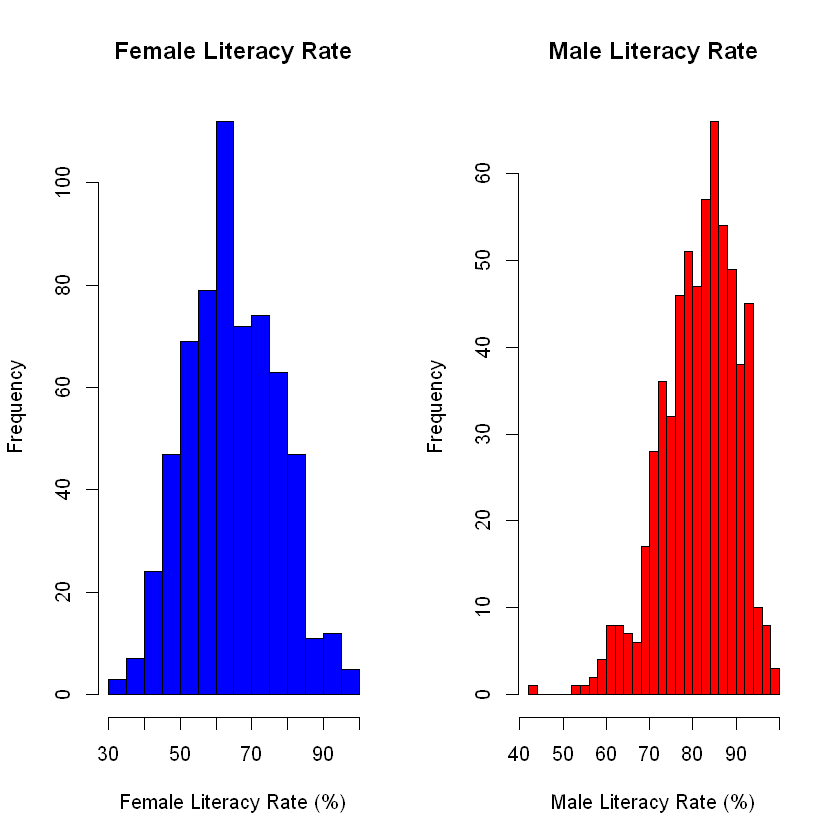

In [13]:
par(mfrow = c(1, 2))  # Set up a 1x2 plot grid
hist(data$FEMALE_LIT, main = "Female Literacy Rate", 
     xlab = "Female Literacy Rate (%)", ylab = "Frequency", col = "blue", breaks = 20)
hist(data$MALE_LIT, main = "Male Literacy Rate", 
     xlab = "Male Literacy Rate (%)", ylab = "Frequency", col = "red", breaks = 20)

COMENTARIO:el hombre tiene una mayor tasa de educacion que la mujer en promedio . ya que su distribuccion presenta una cola hacia la derecha . mientra que de la mujer tiene menos asimetria.

In [14]:
X <- data[, !(names(data_complete) %in% c("FEMALE_LIT", 'STATNAME','DISTNAME','DISTRICTS','BLOCKS','VILLAGES'))]
y <- data$FEMALE_LIT

ERROR: Error in eval(expr, envir, enclos): objeto 'data_complete' no encontrado


In [55]:
datita <- select(data, STATCD, DISTCD, TOTPOPULAT, P_URB_POP, POPULATION_0_6,
                 GROWTHRATE, SEXRATIO, P_SC_POP, P_ST_POP, AREA_SQKM, TOT_6_10_15,
                 TOT_11_13_15, SCHTOT, SCHTOTG, SCHTOTP, SCHTOTGR)

ERROR: Error in select(data, STATCD, DISTCD, TOTPOPULAT, P_URB_POP, POPULATION_0_6, : no se pudo encontrar la función "select"


In [ ]:
X <- datita 
y <- data$FEMALE_LIT

In [ ]:
set.seed(1234)
train_idx <- sample(1:nrow(data_complete), 0.8 * nrow(data_complete))
X_train <- as.matrix(X[train_idx, ])
X_test <- as.matrix(X[-train_idx, ])
y_train <- y[train_idx]
y_test <- y[-train_idx]

In [ ]:
lasso_low <- cv.glmnet(X_train, y_train, alpha = 1)
y_pred_low <- predict(lasso_low, newx = X_test, s = "lambda.min")
r2_low <- 1 - sum((y_test - y_pred_low)^2) / sum((y_test - mean(y_test))^2)
cat("R^2 for low-dimensional model:", r2_low, "\n")

**D**

In [ ]:
X_high <- model.matrix(~ .^2 + I(TOTPOPULAT^2) + I(P_URB_POP^2) + 
                      I(POPULATION_0_6^2), data = as.data.frame(X))[,-1]
X_high_train <- X_high[train_idx, ]
X_high_test <- X_high[-train_idx, ]
lasso_high <- cv.glmnet(X_high_train, y_train, alpha = 1)
y_pred_high <- predict(lasso_high, newx = X_high_test, s = "lambda.min")
r2_high <- 1 - sum((y_test - y_pred_high)^2) / sum((y_test - mean(y_test))^2)
cat("R^2 for high-dimensional model:", r2_high, "\n")


**e**

In [ ]:
lambda_seq <- 10^seq(4, -3, length = 100)
lasso_path <- glmnet(X_high_train, y_train, alpha = 1, lambda = lambda_seq)
nonzero_coefs <- apply(coef(lasso_path), 2, function(x) sum(x != 0) - 1)
plot(log10(lambda_seq), nonzero_coefs, type = "l", col = "blue", lwd = 2,
     xlab = "log10(Lambda)", ylab = "Number of Nonzero Coefficients",
     main = "LASSO Coefficient Path")
grid()